### Libs import and configuration

In [ ]:
!pip install plotly --upgrade

     |████████████████████████████████| 20.6 MB 1.3 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
  from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import pytz
import json
import os

In [ ]:
pd.options.plotting.backend = "plotly"

In [ ]:
my_timezone = pytz.timezone('Brazil/East')

# Data Linking

### YouTube Data

In [ ]:
# juliana = pd.read_csv('/content/drive/Shareddrives/Data Reporting/youtube_categorias/juliana_youtube.csv',parse_dates=['time'])
# vithor = pd.read_csv('/content/drive/Shareddrives/Data Reporting/youtube_categorias/vithor_youtube.csv',parse_dates=['time'])
# patryck = pd.read_csv('/content/drive/Shareddrives/Data Reporting/youtube_categorias/patryck_youtube.csv',parse_dates=['time']).query('time.dt.year >= 2020')


In [ ]:
# yt = pd.concat([juliana, vithor, patryck])

In [ ]:
# yt.to_csv('/content/drive/Shareddrives/Data Reporting/youtube_with_categories_linked.csv', index=False)

In [ ]:
yt = pd.read_csv(
    '/content/drive/Shareddrives/Data Reporting/youtube_with_categories_linked.csv', 
    parse_dates=['time']
)

In [ ]:
yt

,channel,channelUrl,header,title,titleUrl,time,products,details,category,user,period_day
0,Big Brother Brasil,https://www.youtube.com/channel/UC8WT0kby-iTFM...,YouTube,Watched AS MENINAS DESCOBREM O PLANO DE HADSON...,https://www.youtube.com/watch?v=S_IRHjcHZPo,2021-07-17 19:02:37.688000-03:00,YouTube,NaN,Entertainment,Juliana,Noite
1,GIOH,https://www.youtube.com/channel/UCTCykZFeSbgMu...,YouTube,Watched FESTA DE 1 ANO DO BABY Z 🥳🎪🍭,https://www.youtube.com/watch?v=8HLSmfNoADw,2021-07-17 18:49:49.263000-03:00,YouTube,NaN,Entertainment,Juliana,Tarde
2,Netflix Brasil,https://www.youtube.com/channel/UCc1l5mTmAv2GC...,YouTube,Watched Mais Brasil na Tela | Netflix Brasil,https://www.youtube.com/watch?v=vGcClIN07kk,2021-07-17 11:33:25.948000-03:00,YouTube,NaN,Entertainment,Juliana,Manhã
3,Netflix Brasil,https://www.youtube.com/channel/UCc1l5mTmAv2GC...,YouTube,Watched Fugindo do Amor | Trailer oficial | Ne...,https://www.youtube.com/watch?v=mHPNYVyMXtw,2021-07-17 11:31:13.605000-03:00,YouTube,NaN,Entertainment,Juliana,Manhã
4,Netflix Brasil,https://www.youtube.com/channel/UCc1l5mTmAv2GC...,YouTube,Watched Diários de Intercâmbio | Trailer ofici...,https://www.youtube.com/watch?v=rIXv7zEtN3w,2021-07-17 11:28:46.249000-03:00,YouTube,NaN,Entertainment,Juliana,Manhã
...,...,...,...,...,...,...,...,...,...,...,...
29800,RihannaVEVO,https://www.youtube.com/channel/UC2xskkQVFEpLc...,YouTube,Watched Rihanna - Don't Stop The Music,https://www.youtube.com/watch?v=yd8jh9QYfEs,2015-02-23 19:48:42.616000-03:00,YouTube,NaN,Music,Juliana,Noite
29801,LadyGagaVEVO,https://www.youtube.com/channel/UC07Kxew-cMIay...,YouTube,Watched Lady Gaga - Just Dance ft. Colby O'Don...,https://www.youtube.com/watch?v=2Abk1jAONjw,2015-02-23 19:46:33.496000-03:00,YouTube,NaN,Music,Juliana,Noite
29802,BeloVEVO,https://www.youtube.com/channel/UCRIxDttbZcb9A...,YouTube,Watched Belo - Perfume / Intriga da Oposição /...,https://www.youtube.com/watch?v=PIyZ0ABh2y0,2015-02-23 19:39:47.480000-03:00,YouTube,NaN,Music,Juliana,Noite
29803,BeloVEVO,https://www.youtube.com/channel/UCRIxDttbZcb9A...,YouTube,Watched Belo - Reinventar / Pra Ver o Sol Bril...,https://www.youtube.com/watch?v=1WfyBacToIw,2015-02-23 19:36:33.638000-03:00,YouTube,NaN,Music,Juliana,Noite


### YouTube

In [ ]:
df_list = []
for file in next(os.walk('/content/drive/Shareddrives/Data Reporting/historico_youtube'))[2]:
    with open(
        f'/content/drive/Shareddrives/Data Reporting/historico_youtube/{file}', 'r', 
        encoding='utf-8'
        ) as f:  
      data = json.loads(f.read())

      no_ads_data = [row for row in data if 'subtitles' in row.keys()]

      df = pd.json_normalize(no_ads_data, 
          record_path=['subtitles'], 
          meta=['header', 'title', 'titleUrl', 'time', 'products', 'details'],
          errors='ignore',
          record_prefix='subtitles.'
      )

      if 'patryck' in file:
          df['user'] = 'Patryck'
      elif 'vithor' in file:
          df['user'] = 'Vithor'
      elif 'juliana' in file:
          df['user'] = 'Juliana'

      df_list.append(df)
      
youtube = pd.concat(df_list)

In [ ]:
youtube.user.unique()

In [ ]:
youtube.info()

In [ ]:
youtube['time'] = pd.to_datetime(youtube['time'])

In [ ]:
youtube['time'] = youtube['time'].dt.tz_convert(my_timezone)

In [ ]:
youtube[['user', 'chanel', 'chanelUrl', 'title', 'titleUrl', 'time']].to_csv('/content/drive/Shareddrives/Data Reporting/youtube_hist_linked.csv', index=False)

### Kindle 

In [ ]:
df_list = []
for file in next(os.walk('/content/drive/Shareddrives/Data Reporting/kindle'))[2]:
    temp_df = pd.read_csv(f'/content/drive/Shareddrives/Data Reporting/kindle/{file}')
    
    temp_df['plataform'] = 'kindle'

    if 'vithor' in file:
      temp_df['user'] = 'Vithor'
    elif 'juliana' in file:
      temp_df['user'] = 'Juliana'
    elif 'patryck' in file:
      temp_df['user'] = 'Patryck'

    df_list.append(temp_df)

kindle = pd.concat(df_list)

In [ ]:
kindle.head()

,startdate,enddate,ASIN,purchased_marketplace,preferred_marketplace,device_family,DSN,device_software_version,content_type,total_reading_millis,number_of_page_flips,plataform,user
0,Not Available,2020-06-26T21:31:00Z,B07Y48CCRZ,NaN,Brazil,Kindle E-reader,G0910L049356003F,NaN,E-Book,NaN,NaN,kindle,Juliana
1,Not Available,2020-06-03T02:18:36Z,XK3MO2EJ5XYHRD6UNCPCE3ORTIYXUQ6N,NaN,Brazil,Kindle E-reader,G0910L049356003F,NaN,Personal Document,NaN,NaN,kindle,Juliana
2,Not Available,2020-06-04T22:20:28Z,B07Y48CCRZ,Brazil,Brazil,Kindle E-reader,G0910L049356003F,NaN,E-Book,NaN,NaN,kindle,Juliana
3,Not Available,2020-06-11T01:09:30Z,B07Y48CCRZ,Brazil,Brazil,Kindle E-reader,G0910L049356003F,NaN,E-Book,NaN,NaN,kindle,Juliana
4,Not Available,2020-03-26T20:28:11Z,B01GXN4MQ0,Brazil,Brazil,Kindle E-reader,G0910L049356003F,NaN,E-Book,NaN,NaN,kindle,Juliana


In [ ]:
kindle.user.value_counts()

Patryck    271
Juliana    261
Vithor     182
Name: user, dtype: int64

In [ ]:
kindle['enddate'] = pd.to_datetime(kindle['enddate'])

In [ ]:
kindle['time'] = kindle['enddate'].dt.tz_convert(my_timezone)

In [ ]:
kindle.drop(columns='enddate')

,startdate,ASIN,purchased_marketplace,preferred_marketplace,device_family,DSN,device_software_version,content_type,total_reading_millis,number_of_page_flips,plataform,user,time
0,Not Available,B07Y48CCRZ,NaN,Brazil,Kindle E-reader,G0910L049356003F,NaN,E-Book,NaN,NaN,kindle,Juliana,2020-06-26 18:31:00-03:00
1,Not Available,XK3MO2EJ5XYHRD6UNCPCE3ORTIYXUQ6N,NaN,Brazil,Kindle E-reader,G0910L049356003F,NaN,Personal Document,NaN,NaN,kindle,Juliana,2020-06-02 23:18:36-03:00
2,Not Available,B07Y48CCRZ,Brazil,Brazil,Kindle E-reader,G0910L049356003F,NaN,E-Book,NaN,NaN,kindle,Juliana,2020-06-04 19:20:28-03:00
3,Not Available,B07Y48CCRZ,Brazil,Brazil,Kindle E-reader,G0910L049356003F,NaN,E-Book,NaN,NaN,kindle,Juliana,2020-06-10 22:09:30-03:00
4,Not Available,B01GXN4MQ0,Brazil,Brazil,Kindle E-reader,G0910L049356003F,NaN,E-Book,NaN,NaN,kindle,Juliana,2020-03-26 17:28:11-03:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,Not Available,VCP6WMC3NDOEBKROVZMII6ZBRAGFPEXH,NaN,Brazil,Kindle E-reader,G090WF05009302PK,NaN,Personal Document,NaN,NaN,kindle,Patryck,2020-12-28 06:16:43-02:00
267,Not Available,VCP6WMC3NDOEBKROVZMII6ZBRAGFPEXH,NaN,Brazil,Kindle E-reader,G090WF05009302PK,NaN,Personal Document,NaN,NaN,kindle,Patryck,2020-12-28 07:30:36-02:00
268,Not Available,NQAAWCK2IF3B7BRQRGDSZW2V2NF5OYBC,NaN,Brazil,Kindle E-reader,G090WF05009302PK,NaN,Personal Document,NaN,NaN,kindle,Patryck,2021-06-06 05:24:11-03:00
269,Not Available,NQAAWCK2IF3B7BRQRGDSZW2V2NF5OYBC,NaN,Brazil,NaN,662007b8a291476b9b45c2f8805bc903,NaN,Personal Document,NaN,NaN,kindle,Patryck,2021-05-01 01:19:01-03:00


In [ ]:
kindle.to_csv('/content/drive/Shareddrives/Data Reporting/kindle_linked.csv', index=False)

### Browser

In [ ]:
from datetime import timezone, datetime

In [ ]:
browser = pd.read_json('/content/drive/Shareddrives/Data Reporting/historico_chrome /google_hist_vithor.json')
browser['user'] = 'Vithor'

In [ ]:
for file in next(os.walk('/content/drive/Shareddrives/Data Reporting/historico_chrome '))[2][1:]:
    with open(
        f'/content/drive/Shareddrives/Data Reporting/historico_chrome /{file}', 'r', 
        encoding='utf-8'
        ) as f:  
      data = json.loads(f.read())

      temp_df = pd.json_normalize(data, record_path=['Browser History'])
      if 'patryck' in file:
          temp_df['user'] = 'Patryck'
      elif 'juliana' in file:
          temp_df['user'] = 'Juliana'

      browser = pd.concat([browser, temp_df])

In [ ]:
browser.shape

(125786, 7)

In [ ]:
browser['user'].unique()

array(['Vithor', 'Patryck', 'Juliana'], dtype=object)

In [ ]:
browser['time'] = pd.to_datetime(browser['time_usec'], unit='us')

In [ ]:
pd.to_timedelta?

In [ ]:
browser.time.dt.year.unique()

array([2021, 2020])

In [ ]:
browser['time'] = browser['time'].dt.tz_localize(timezone.utc)

In [ ]:
browser['time'] = browser['time'].dt.tz_convert(my_timezone)

In [ ]:
browser[['user', 'page_transition', 'title', 'url', 'time']].to_csv('/content/drive/Shareddrives/Data Reporting/browser_hist_linked.csv', index=False)

### Spotify

In [ ]:
df_list = []
for file in next(os.walk('/content/drive/Shareddrives/Data Reporting/spotify'))[2]:
    
    temp_df = pd.read_json(f'/content/drive/Shareddrives/Data Reporting/spotify/{file}')

    if 'Patryck' in file:
        temp_df['user'] = 'Patryck'
    elif 'Vithor' in file:
        temp_df['user'] = 'Vithor'

    df_list.append(temp_df)

spotify = pd.concat(df_list)

In [ ]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12649 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     12649 non-null  object
 1   artistName  12649 non-null  object
 2   trackName   12649 non-null  object
 3   msPlayed    12649 non-null  int64 
 4   user        12649 non-null  object
dtypes: int64(1), object(4)
memory usage: 592.9+ KB


In [ ]:
spotify.user.value_counts()

Patryck    10769
Vithor      1880
Name: user, dtype: int64

In [ ]:
spotify.head()

,endTime,artistName,trackName,msPlayed,user
0,2020-07-14 02:52,My Name Is,O que é o poço ?,0,Vithor
1,2020-07-14 02:52,My Name Is,Old tow road,47560,Vithor
2,2020-07-14 02:53,Tenacious D,Classico,30707,Vithor
3,2020-07-14 02:53,My Name Is,O verdadeiro final de a caverna do dragão,2200,Vithor
4,2020-07-14 02:56,Eville at the Road,Future Days- Joel Cover,47952,Vithor


In [ ]:
spotify['time'] = pd.to_datetime(spotify['endTime'])

In [ ]:
spotify['time'] = spotify['time'].dt.tz_localize(timezone.utc)

In [ ]:
spotify['time'] = spotify['time'].dt.tz_convert(my_timezone)

In [ ]:
spotify.to_csv('/content/drive/Shareddrives/Data Reporting/spotify_linked.csv', index=False)

## API Youtube - Categories

In [ ]:
from googleapiclient.discovery import build

In [ ]:
yt.titleUrl.fillna(value='', inplace=True)
yt = yt[yt.titleUrl != '']

In [ ]:
# Carregando csv categorias
categories = pd.read_csv('https://gist.githubusercontent.com/Vithork/7e9d0fe79796e4cfd27411d5e92df601/raw/c943eafd695f123bc0e5fc5167846e2fa4265fbc/csv')
categories = categories.set_index('name').number.to_dict()
categories = dict((str(y),x) for x,y in categories.items())

In [ ]:
# Documentar depois
def main(api_key, df):
  def puxa_categoria():
    lista = puxa_json()
    lista_categorias = []
    for i in range(len(lista)):
      try:
        lista_categorias.append(lista[i]['items'][0]['snippet']['categoryId'])
      except:
        lista_categorias.append('00')
    return [categories.get(n, n) for n in lista_categorias]
  
  def puxa_json():
    youtube = build('youtube', 'v3', developerKey=api_key)
    part_string = 'snippet'
    lista = []
    video_ids = 0 
    for index, row in df.iterrows():
      video_ids = (row['titleUrl'][-11:])
      requests = youtube.videos().list(
        	part=part_string,
        	id=video_ids
        ).execute()
      lista.append(requests)
    return lista
  return puxa_categoria()

In [ ]:
#categoria_valores = main('API-KEY',yt)
#df['categories'] = categoria_valores

## Platforms usage time linking

In [ ]:
youtube['plataform'] = 'youtube'
kindle['plataform'] = 'kindle'
browser['plataform'] = 'browser'
spotify['plataform'] = 'spotify'

In [ ]:
plataforms_time_behav = pd.concat([
      youtube[['time', 'plataform', 'user']],
      kindle[['time', 'plataform', 'user']],
      browser[['time', 'plataform', 'user']],
      spotify[['time', 'plataform', 'user']]
])

In [ ]:
plataforms_time_behav.head()

,time,plataform,user
0,2021-07-17 11:53:58.854000-03:00,youtube,Patryck
1,2021-07-17 11:40:19.659000-03:00,youtube,Patryck
2,2021-07-17 02:39:08.866000-03:00,youtube,Patryck
3,2021-07-17 00:30:42.648000-03:00,youtube,Patryck
4,2021-07-16 23:56:11.099000-03:00,youtube,Patryck


In [ ]:
plataforms_time_behav.shape

(185249, 3)

In [ ]:
plataforms_time_behav.to_csv('/content/drive/Shareddrives/Data Reporting/plataforms_time_behavior_linked.csv', index=False)

In [ ]:
pth = plataforms_time_behav

In [ ]:
pth['time_interval'] = pth['time'].dt.hour.apply(time_interval_day)

NameError: ignored

In [ ]:
pth_grouped_size = (
    pth.groupby(['user', 'plataform', 'time_interval'])
    .size()
    .groupby(level=[0, 1])
    .apply(lambda x: (x / x.sum()) * 100)
    .reset_index()

)
pth_grouped_size.columns = ['user', 'plataform', 'time_interval', 'percentage']

In [ ]:
pth_grouped_size.head(6)

In [ ]:
pth_grouped_size[pth_grouped_size['user'] == 'Vithor'].plot(kind='bar', x='time_interval', y='percentage', color='plataform', barmode='group')

In [ ]:
brwr = pd.read_csv('/content/drive/Shareddrives/Data Reporting/plataforms_time_behavior_linked.csv')

In [ ]:
brwr.head()

,time,plataform,user,period_day
0,2021-07-17 11:53:58.854000-03:00,youtube,Patryck,Manhã
1,2021-07-17 11:40:19.659000-03:00,youtube,Patryck,Manhã
2,2021-07-17 02:39:08.866000-03:00,youtube,Patryck,Madrugada
3,2021-07-17 00:30:42.648000-03:00,youtube,Patryck,Madrugada
4,2021-07-16 23:56:11.099000-03:00,youtube,Patryck,Noite


In [ ]:
brwr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185249 entries, 0 to 185248
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype              
---  ------     --------------   -----              
 0   time       185249 non-null  datetime64[ns, UTC]
 1   plataform  185249 non-null  object             
 2   user       185249 non-null  object             
dtypes: datetime64[ns, UTC](1), object(2)
memory usage: 4.2+ MB


In [ ]:
brwr['time'] = pd.to_datetime(brwr['time'])

In [ ]:
brwr['time'] = brwr['time'].dt.tz_convert(my_timezone)

In [ ]:
brwr['period_day'] = brwr['time'].dt.hour.apply(time_interval_day)

In [ ]:
brwr.to_csv('/content/drive/Shareddrives/Data Reporting/plataforms_time_behavior_linked.csv', index=False)

# Analyses

In [ ]:
def time_interval_day(x):
  if x >= 0 and x <= 5:
    time = 'Madrugada'
  elif x >= 5 and x <= 12:
    time = 'Manhã'
  elif x >= 12 and x <= 18:
    time = 'Tarde'
  else:
    time = 'Noite'
  return time

## YouTube

### Quais categorias de vídeos são mais vistos?

In [ ]:
yt = pd.read_csv('/content/drive/Shareddrives/Data Reporting/youtube_with_categories_linked.csv')

In [ ]:
yt['time'] = pd.to_datetime(yt['time'], utc=True)

In [ ]:
yt['time'] = yt['time'].dt.tz_convert(my_timezone)

In [ ]:
por_categoria = yt.groupby(['user', 'category'], as_index=False).size()

In [ ]:
por_categoria.head()

In [ ]:
por_categoria.plot(
    kind='bar', 
    x='size', 
    y='category', 
    color='user', 
    barmode='group',
    title='Número de vídeos visualizados por categoria')

In [ ]:
category_prop = (
    yt
    .groupby(['user', 'category'])
    .size()
    .groupby(level=[0])
    .apply(lambda x: (x / x.sum()) * 100)
    
).reset_index()

In [ ]:
category_prop.columns = ['user', 'categorie', 'percentage']

In [ ]:
category_prop.plot(kind='bar', 
                   y='percentage', 
                   x='categorie', 
                   color='user', 
                   barmode='group',
                   title='Porcentagem de categoria de vídeos assistidos')

### As categorias mais assistidas mudaram durante o tempo?

In [ ]:
category_prop = (
    yt
    .groupby(['user', 'category'])
    .size()
    .groupby(level=[0])
    .apply(lambda x: (x / x.sum()) * 100)
    
).reset_index()

In [ ]:
category_in_years = (
    yt
    .groupby(['user', yt.time.dt.day, 'category'])
    .size()
    .groupby(level=[0, 1])
    .apply(lambda x: (x / x.sum()) * 100)
).reset_index()
category_in_years.head(10)

,user,time,category,0
0,Juliana,1,Comedy,3.525641
1,Juliana,1,Education,7.051282
2,Juliana,1,Entertainment,24.358974
3,Juliana,1,Gaming,1.282051
4,Juliana,1,Howto & Style,3.205128
5,Juliana,1,Music,23.397436
6,Juliana,1,Nonprofits &Activism,0.320513
7,Juliana,1,People & Blogs,23.717949
8,Juliana,1,Pets & Animals,0.320513
9,Juliana,1,Science & Technology,1.602564


In [ ]:
category_in_years.columns = ['user', 'time', 'category', 'percentage']

In [ ]:
(
    category_in_years[
                      category_in_years['user'] == 'Juliana'
                      #& (category_in_years['time'] < 2021)
                      ]
    .plot(kind='area', x='time', y='percentage', line_group='category', color='category')
)

### Quais categorias de vídeos são mais vistos em diferentes horários?

In [ ]:
category_in_years = (
    yt
    .groupby(['user', yt.time.dt.hour, 'category'])
    .size()
    .groupby(level=[0, 1])
    .apply(lambda x: (x / x.sum()) * 100)
).reset_index()
category_in_years.head(10)

,user,time,category,0
0,Juliana,0,Autos & Vehicles,0.353357
1,Juliana,0,Comedy,2.826855
2,Juliana,0,Education,2.650177
3,Juliana,0,Entertainment,29.681979
4,Juliana,0,Film & Animation,0.883392
5,Juliana,0,Gaming,5.123675
6,Juliana,0,Howto & Style,1.236749
7,Juliana,0,Music,10.954064
8,Juliana,0,News & Politics,0.883392
9,Juliana,0,Nonprofits &Activism,0.530035


### Quais os canais mais assistidos?

In [ ]:
channel[(channel.user == 'Juliana')].sort_values(by='size', ascending=False).head(10)

NameError: ignored

In [ ]:
channel[(channel.user == 'Patryck')].sort_values(by='size', ascending=False).head(10)

NameError: ignored

In [ ]:
channel[(channel.user == 'Vithor')].sort_values(by='size', ascending=False).head(10)

### Categorias mais vistas nos diferentes periodos do dia

In [ ]:
category_in_day = (
    yt
    .groupby(['user', 'period_day', 'category'])
    .size()
    .groupby(level=[0, 1])
    .apply(lambda x: (x / x.sum()) * 100)
).reset_index()

In [ ]:
category_in_day.columns = ['user','time','category','percentage']

In [ ]:
(
   category_in_day
  .query('user == "Vithor"')
  .plot(
        kind='bar',
        x = 'time',
        y='percentage',
        color = 'category',
        barmode = 'group')
)

### Quais categorias e canais deram match entre nós? 

In [ ]:
yt['category'].unique()

array(['Entertainment', 'People & Blogs', 'Music', 'Howto & Style',
       'Travel & Events', 'Comedy', 'Science & Technology', 'Education',
       'News & Politics', 'Nonprofits &Activism', 'Film & Animation',
       'Autos & Vehicles', 'Gaming', 'Pets & Animals', 'Sports',
       'Trailers', 'Movies', '00'], dtype=object)

In [ ]:
grouped = yt[yt['category'] == 'Science & Technology'].groupby(['channel', 'user'], as_index=False).size()

In [ ]:
grouped = yt[yt['category'] == 'Music'].groupby(['channel', 'user'], as_index=False).size()
match_list = []
for i in grouped['channel'].unique():
    if len(grouped[grouped['channel'] == i]['user'].unique()) == 3:
      match_list.append(i)

print(match_list)



['Various Artists - Topic']


In [ ]:
df_category_list = []
for j in yt['category'].unique():
  grouped = yt[yt['category'] == j].groupby(['channel', 'user'], as_index=False).size()
  match_list = {'category': [],'channel': [], 'views_mean': []}
  
  for i in grouped['channel'].unique():
      if len(grouped[grouped['channel'] == i]['user'].unique()) == 3:
        match_list['views_mean'].append((grouped[grouped['channel'] == i]['size'].sum()) / 3)
        match_list['category'].append(j)
        match_list['channel'].append(i)
  
  df_category_list.append(pd.DataFrame(match_list))

match_df = pd.concat(df_category_list)

In [ ]:
match_df.category.unique()

array(['Entertainment', 'People & Blogs', 'Music', 'Howto & Style',
       'Travel & Events', 'Comedy', 'Science & Technology', 'Education',
       'News & Politics', 'Nonprofits &Activism', 'Sports'], dtype=object)

In [ ]:
match_df.to_csv('/content/drive/Shareddrives/Data Reporting/youtube_match.csv', index=False)

In [ ]:
grouped = yt[yt['category'] == 'Science & Technology'].groupby(['channel', 'user'], as_index=False).size()
match_list = {}
for i in grouped['channel'].unique():
    if len(grouped[grouped['channel'] == i]['user'].unique()) == 3:
      media = (grouped[grouped['channel'] == i]['size'].sum()) / 3
      match_list[i] = media

pd.DataFrame({'channel': match_list.keys(), 'mean': match_list.values()}).sort_values(by='mean', ascending=False).head(10)

,channel,mean
3,Canaltech,37.333333
13,Peixe Babel,19.333333
14,Programação Dinâmica,14.666667
4,Código Fonte TV,13.666667
9,Filipe Deschamps,10.333333
15,Seja Um Data Scientist,9.666667
6,DevMedia,7.666667
8,Fabio Akita,7.000000
0,Alura Cursos Online,6.666667
1,Be!Tech,6.333333


In [ ]:
yt[(yt['channel'] == 'Spotniks') & (yt['user'] == 'Juliana')]

,channel,channelUrl,header,title,titleUrl,time,products,details,category,user,period_day
1125,Spotniks,https://www.youtube.com/channel/UCr88VYLpASHOD...,YouTube,"Watched ""Você me conhece como a voz do GOOGLE,...",https://www.youtube.com/watch?v=wiqiocoj91U,2021-03-03 19:12:15.068000-03:00,YouTube,NaN,News & Politics,Juliana,Noite


In [ ]:
yt[(yt['user'] == 'Juliana') & (yt['category'] == 'Music')]['title'].value_counts(ascending=False)

Watched Midian Lima - Prioridade (Live Session)                                              25
Watched Preto no Branco - Os Sonhos de Deus ft. Juninho Black, Lukão Carvalho, Eli Soares    19
Watched Anderson Freire feat. Gisele Nascimento - O Mapa Do Tesouro (Ao Vivo)                16
Watched Midian Lima - Jó - COM LETRA (VideoLETRA® oficial MK Music)                          16
Watched Preto no Branco - Ninguém Explica Deus (Ao Vivo) ft. Gabriela Rocha                  15
                                                                                             ..
Watched Os Barões da Pisadinha - Tipo iFood (Clipe Oficial)                                   1
Watched Patati Patatá - Os Sentidos + Canções Animadas (+40 min)                              1
Watched Seu Jorge - Zé do Caroço (Ao Vivo)                                                    1
Watched Maria Rita - Como Nossos Pais                                                         1
Watched BOLOFOFOS | LOBO MAU-LANDRO     

In [ ]:
yt[(yt['user'] == 'Vithor') & (yt['channel'] == 'Programação Dinâmica')]

,channel,channelUrl,header,title,titleUrl,time,products,details,category,user,period_day
2949,Programação Dinâmica,https://www.youtube.com/channel/UC70mr11REaCqg...,YouTube,Watched CONVERTENDO uma coluna de um DataFrame...,https://www.youtube.com/watch?v=MVd1cs7TDgA,2021-06-13 08:07:04.580000-03:00,YouTube,NaN,Education,Vithor,Manhã
2959,Programação Dinâmica,https://www.youtube.com/channel/UC70mr11REaCqg...,YouTube,Watched CONVERTENDO uma coluna de um DataFrame...,https://www.youtube.com/watch?v=MVd1cs7TDgA,2021-06-12 19:48:56.352000-03:00,YouTube,NaN,Education,Vithor,Noite
3471,Programação Dinâmica,https://www.youtube.com/channel/UC70mr11REaCqg...,YouTube,Watched Introdução ao Aprendizado de Máquina(d...,https://www.youtube.com/watch?v=QfYGV064mRI,2021-05-29 17:37:14.655000-03:00,YouTube,NaN,Science & Technology,Vithor,Tarde
3665,Programação Dinâmica,https://www.youtube.com/channel/UC70mr11REaCqg...,YouTube,Watched CÂMERA VIRTUAL Fotorrealista com Ray T...,https://www.youtube.com/watch?v=y9beDEOk3bM,2021-05-22 18:30:41.888000-03:00,YouTube,NaN,Science & Technology,Vithor,Tarde
4477,Programação Dinâmica,https://www.youtube.com/channel/UC70mr11REaCqg...,YouTube,Watched Explorando os dados da PNAD especial C...,https://www.youtube.com/watch?v=jMN61_T3Yl0,2021-05-01 17:09:33.929000-03:00,YouTube,NaN,Science & Technology,Vithor,Tarde
4555,Programação Dinâmica,https://www.youtube.com/channel/UC70mr11REaCqg...,YouTube,Watched Github NÃO Basta! Como Documentar PROJ...,https://www.youtube.com/watch?v=gRxqAkWDlmA,2021-04-30 11:07:42.725000-03:00,YouTube,NaN,Education,Vithor,Manhã
4573,Programação Dinâmica,https://www.youtube.com/channel/UC70mr11REaCqg...,YouTube,Watched Ser AUTODIDATA NÃO é uma OPÇÃO | Hands...,https://www.youtube.com/watch?v=GKPhdBbwycA,2021-04-29 19:57:52.048000-03:00,YouTube,NaN,Education,Vithor,Noite
4634,Programação Dinâmica,https://www.youtube.com/channel/UC70mr11REaCqg...,YouTube,Watched Como BAIXAR e SALVAR arquivos no Googl...,https://www.youtube.com/watch?v=sbOnV78uoys,2021-04-27 20:44:57.580000-03:00,YouTube,NaN,Education,Vithor,Noite
4921,Programação Dinâmica,https://www.youtube.com/channel/UC70mr11REaCqg...,YouTube,Watched Como OBJETOS 3D são Representados no C...,https://www.youtube.com/watch?v=rEq17GCrGZE,2021-04-22 19:05:04.746000-03:00,YouTube,NaN,Science & Technology,Vithor,Noite
5071,Programação Dinâmica,https://www.youtube.com/channel/UC70mr11REaCqg...,YouTube,Watched Modelagem 3D da Terra com Python | Com...,https://www.youtube.com/watch?v=6RXmgUgB-AU,2021-04-17 18:35:14.958000-03:00,YouTube,NaN,Science & Technology,Vithor,Tarde


## Chrome History

In [ ]:
from datetime import timezone, datetime

In [ ]:
chr = pd.read_csv('/content/drive/Shareddrives/Data Reporting/browser_hist_linked.csv')

In [ ]:
chr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126013 entries, 0 to 126012
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype                      
---  ------           --------------   -----                      
 0   user             126013 non-null  object                     
 1   page_transition  126013 non-null  object                     
 2   title            123801 non-null  object                     
 3   url              126013 non-null  object                     
 4   time             126013 non-null  datetime64[ns, Brazil/East]
 5   url_root         126013 non-null  object                     
dtypes: datetime64[ns, Brazil/East](1), object(5)
memory usage: 5.8+ MB


In [ ]:
chr['time'] = pd.to_datetime(chr['time'], utc=True)
chr['time'] = chr['time'].dt.tz_convert(my_timezone)

In [ ]:
chr[(chr.user == 'Vithor') & (chr.time.dt.year == 2021)].time.dt.month.value_counts()

3    21535
4    17477
5    14460
2    14006
1    11138
6     1272
7      659
Name: time, dtype: int64

### Site em comum

In [ ]:
import re

In [ ]:
chr['url_root'] = chr['url'].apply(lambda x: ''.join(re.findall('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', x)))

In [ ]:
chr[chr['title'].str.contains('ifood', na=False)]['user'].unique()

array(['Vithor', 'Patryck', 'Juliana'], dtype=object)

In [ ]:
chr.groupby(['url_root', 'user'], as_index=False).size()

,url_root,user,size
0,,Juliana,15
1,,Patryck,1118
2,,Vithor,9978
3,http://119.23.8.25,Vithor,2
4,http://127.0.0.1,Patryck,67
...,...,...,...
4905,https://zoom.us,Vithor,9
4906,https://zorinos.com,Patryck,16
4907,https://zviybblezmc.com,Vithor,1
4908,https://zxgroymagqu.com,Vithor,5


In [ ]:
chr.user.value_counts()

Vithor     101675
Patryck     23785
Juliana       553
Name: user, dtype: int64

In [ ]:
# for j in chr['site_root'].unique():
grouped = chr.groupby(['url_root', 'user'], as_index=False).size()
match_list = {}
for i in grouped['url_root'].unique():
    if len(grouped[grouped['url_root'] == i]['user'].unique()) == 3:
      match_list[i] = grouped[grouped['url_root'] == i]['user'].unique()
      #  match_list[i] = grouped[grouped['channel'] == i]['size'].sum()
print(match_list)

{'': array(['Juliana', 'Patryck', 'Vithor'], dtype=object), 'https://accounts.google.com': array(['Juliana', 'Patryck', 'Vithor'], dtype=object), 'https://doswinuba.com': array(['Juliana', 'Patryck', 'Vithor'], dtype=object), 'https://globoplay.globo.com': array(['Juliana', 'Patryck', 'Vithor'], dtype=object), 'https://hauphuchaum.com': array(['Juliana', 'Patryck', 'Vithor'], dtype=object), 'https://mobile.bet365.com': array(['Juliana', 'Patryck', 'Vithor'], dtype=object), 'https://outlook.live.com': array(['Juliana', 'Patryck', 'Vithor'], dtype=object), 'https://www.coursera.org': array(['Juliana', 'Patryck', 'Vithor'], dtype=object), 'https://www.glassdoor.com.br': array(['Juliana', 'Patryck', 'Vithor'], dtype=object), 'https://www.google.com': array(['Juliana', 'Patryck', 'Vithor'], dtype=object), 'https://www.google.com.br': array(['Juliana', 'Patryck', 'Vithor'], dtype=object), 'https://www.linkedin.com': array(['Juliana', 'Patryck', 'Vithor'], dtype=object)}


### Em quais horários navegamos mais na internet?

In [ ]:
time_hour_prop = (
    chr
    .groupby([chr.user, chr.time.dt.hour])
    .size()
    .groupby(level=[0])
    .apply(lambda x: (x / x.sum()) * 100)
    
).reset_index()

In [ ]:
time_hour_prop.columns = ['user', 'time', 'percentage']

In [ ]:
time_hour_prop.head()

,user,time,percentage
0,Juliana,0,36.528029
1,Juliana,1,1.627486
2,Juliana,2,2.169982
3,Juliana,3,3.435805
4,Juliana,11,8.679928


In [ ]:
time_hour_prop.plot(kind='bar', x='time', y='percentage', color='user', barmode='group')

### O que mais pesquisamos nos diferentes horários?

In [ ]:
chr_nonull = chr.dropna(axis=0)

In [ ]:
ggl = chr_nonull[chr_nonull['title'].str.contains('Pesquisa Google')].copy()

In [ ]:
ggl['title'] = ggl['title'].str[:-18]

In [ ]:
ggl.head()

,user,page_transition,title,url,time,url_root
9,Vithor,RELOAD,variante delta,https://www.google.com/search?q=variante+delta...,2021-07-16 16:54:41.490182-03:00,https://www.google.com
10,Vithor,GENERATED,variante delta,https://www.google.com/search?q=variante+delta...,2021-07-16 09:24:12.016854-03:00,https://www.google.com
11,Vithor,GENERATED,variante delta,https://www.google.com/search?q=variante+delta...,2021-07-16 09:24:00.231656-03:00,https://www.google.com
16,Vithor,RELOAD,livd action,https://www.google.com/search?q=livd+action&ne...,2021-07-15 11:27:19.065377-03:00,https://www.google.com
17,Vithor,FORM_SUBMIT,livd action,https://www.google.com/search?q=livd+action&ne...,2021-07-15 11:08:07.131543-03:00,https://www.google.com


In [ ]:
ggl.title.value_counts().sort_values(ascending=False).head(10)

translate                            122
data science wallpaper                42
steam meme gif                        32
temperatura                           32
Lupin wallpaper                       29
vamo ai ifood                         29
patryck harley alves barros           28
cabelo cacheado moicano masculino     28
data science white background         27
patryck harley                        25
Name: title, dtype: int64

In [ ]:
import nltk.corpus

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords = nltk.corpus.stopwords.words('portuguese')

In [ ]:
len(stopwords)

204

In [ ]:
teste = ggl.copy()

In [ ]:
teste['title'] = teste['title'].str.lower().str.split()

In [ ]:
teste['title'] = teste['title'].apply(lambda x: ' '.join([item for item in x if item not in stopwords]))

In [ ]:
teste

,user,page_transition,title,url,time,url_root
9,Vithor,RELOAD,variante delta,https://www.google.com/search?q=variante+delta...,2021-07-16 16:54:41.490182-03:00,https://www.google.com
10,Vithor,GENERATED,variante delta,https://www.google.com/search?q=variante+delta...,2021-07-16 09:24:12.016854-03:00,https://www.google.com
11,Vithor,GENERATED,variante delta,https://www.google.com/search?q=variante+delta...,2021-07-16 09:24:00.231656-03:00,https://www.google.com
16,Vithor,RELOAD,livd action,https://www.google.com/search?q=livd+action&ne...,2021-07-15 11:27:19.065377-03:00,https://www.google.com
17,Vithor,FORM_SUBMIT,livd action,https://www.google.com/search?q=livd+action&ne...,2021-07-15 11:08:07.131543-03:00,https://www.google.com
...,...,...,...,...,...,...
125992,Juliana,FORM_SUBMIT,ifood tech,https://www.google.com/search?q=ifood+tech&sxs...,2021-07-21 22:24:12.483848-03:00,https://www.google.com
125994,Juliana,FORM_SUBMIT,foodtech significado,https://www.google.com/search?q=foodtech+signi...,2021-07-21 22:24:03.774237-03:00,https://www.google.com
125996,Juliana,GENERATED,ifood,https://www.google.com/search?q=ifood&oq=ifood...,2021-07-21 22:23:54.012878-03:00,https://www.google.com
125997,Juliana,LINK,ifood,https://www.google.com/search?q=ifood&client=t...,2021-07-21 22:23:50.812910-03:00,https://www.google.com


In [ ]:
s = (teste.title.str.split(expand=True)).stack()
s.index = s.index.droplevel(-1)
s.name= 'title'
teste = teste.drop(['title'], axis=1)
teste = (teste.join(s))
teste

,user,page_transition,url,time,url_root,title
9,Vithor,RELOAD,https://www.google.com/search?q=variante+delta...,2021-07-16 16:54:41.490182-03:00,https://www.google.com,variante
9,Vithor,RELOAD,https://www.google.com/search?q=variante+delta...,2021-07-16 16:54:41.490182-03:00,https://www.google.com,delta
10,Vithor,GENERATED,https://www.google.com/search?q=variante+delta...,2021-07-16 09:24:12.016854-03:00,https://www.google.com,variante
10,Vithor,GENERATED,https://www.google.com/search?q=variante+delta...,2021-07-16 09:24:12.016854-03:00,https://www.google.com,delta
11,Vithor,GENERATED,https://www.google.com/search?q=variante+delta...,2021-07-16 09:24:00.231656-03:00,https://www.google.com,variante
...,...,...,...,...,...,...
125994,Juliana,FORM_SUBMIT,https://www.google.com/search?q=foodtech+signi...,2021-07-21 22:24:03.774237-03:00,https://www.google.com,foodtech
125994,Juliana,FORM_SUBMIT,https://www.google.com/search?q=foodtech+signi...,2021-07-21 22:24:03.774237-03:00,https://www.google.com,significado
125996,Juliana,GENERATED,https://www.google.com/search?q=ifood&oq=ifood...,2021-07-21 22:23:54.012878-03:00,https://www.google.com,ifood
125997,Juliana,LINK,https://www.google.com/search?q=ifood&client=t...,2021-07-21 22:23:50.812910-03:00,https://www.google.com,ifood


In [ ]:
teste_group = (teste.groupby([teste.time.dt.hour,'title'], sort=False).size().reset_index(name='count'))[['time','title','count']]
teste_group   

,time,title,count
0,19,variante,1
1,19,delta,1
2,12,variante,2
3,12,delta,2
4,14,livd,2
...,...,...,...
20187,23,salario,3
20188,23,analista,3
20189,23,junior,3
20190,1,dev,1


In [ ]:
df_group = teste_group.groupby(['time'])['count'].transform(max) == teste_group['count']

teste_group = teste_group[df_group].sort_values('time')

In [ ]:
teste_group['time'] = teste_group['time'].apply(time_interval_day)

In [ ]:
teste_group.head(3)

,time,title,count
2815,Madrugada,data,59
2387,Madrugada,python,36
19291,Madrugada,statistical,22


In [ ]:
teste_group.groupby('time').max()

,title,count
time,,
Madrugada,the,59
Manhã,xiaomi,78
Noite,python,81
Tarde,python,228


In [ ]:
sunburst_df = teste_group.reset_index()

In [ ]:
import plotly.express as px
fig = px.sunburst(sunburst_df, path=['time','title'], values='count', color='time')
fig.show()

### Quais palavras mais aparecem no geral?


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [ ]:
stopwords.append("'")

In [ ]:
# List
#chr['titleList'] = chr['title'].astype(str).str.lower().str.split().apply(lambda x: [item for item in x if item not in stopwords])
# String
chr['titleList'] = chr['title'].astype(str).apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

In [ ]:
chr_2021 = chr[chr.url.str.contains('medium', na=False)]

In [ ]:
palavras_geral = ' '.join(chr_2021['titleList'])

(-0.5, 399.5, 199.5, -0.5)

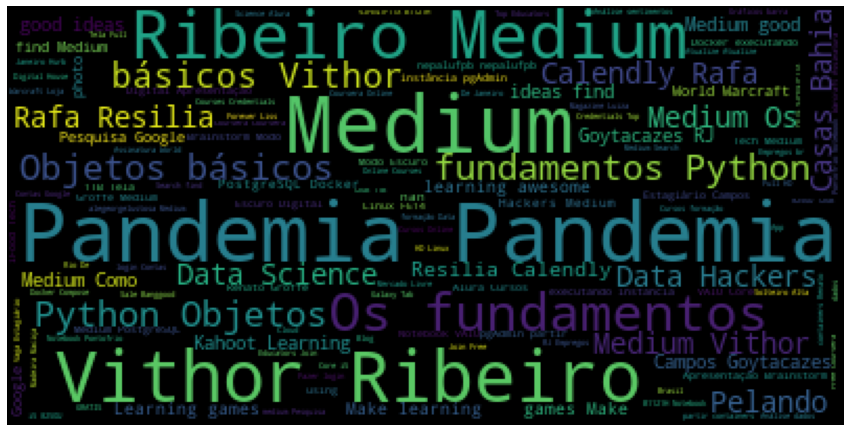

In [ ]:
wordcloud = WordCloud().generate(str(palavras_geral))
plt.figure(figsize=[15,10])
plt.imshow(wordcloud)
plt.axis("off")


In [ ]:
teste

,user,page_transition,url,time,url_root,title
9,Vithor,RELOAD,https://www.google.com/search?q=variante+delta...,2021-07-16 19:54:41.490182+00:00,https://www.google.com,variante
9,Vithor,RELOAD,https://www.google.com/search?q=variante+delta...,2021-07-16 19:54:41.490182+00:00,https://www.google.com,delta
10,Vithor,GENERATED,https://www.google.com/search?q=variante+delta...,2021-07-16 12:24:12.016854+00:00,https://www.google.com,variante
10,Vithor,GENERATED,https://www.google.com/search?q=variante+delta...,2021-07-16 12:24:12.016854+00:00,https://www.google.com,delta
11,Vithor,GENERATED,https://www.google.com/search?q=variante+delta...,2021-07-16 12:24:00.231656+00:00,https://www.google.com,variante
...,...,...,...,...,...,...
125994,Juliana,FORM_SUBMIT,https://www.google.com/search?q=foodtech+signi...,2021-07-22 01:24:03.774237+00:00,https://www.google.com,foodtech
125994,Juliana,FORM_SUBMIT,https://www.google.com/search?q=foodtech+signi...,2021-07-22 01:24:03.774237+00:00,https://www.google.com,significado
125996,Juliana,GENERATED,https://www.google.com/search?q=ifood&oq=ifood...,2021-07-22 01:23:54.012878+00:00,https://www.google.com,ifood
125997,Juliana,LINK,https://www.google.com/search?q=ifood&client=t...,2021-07-22 01:23:50.812910+00:00,https://www.google.com,ifood


In [ ]:
teste.groupby(['title',teste.time.dt.hour]).agg({'title':'size'})

title
title       time       
!           12        2
"           0         1
            13        1
""          1         1
"-"         14        1
...                 ...
●           15        1
动漫图像背景api   10        1
薛小红         16        1
風光動漫api隨機圖像 2         1
👋           22       15

[20192 rows x 1 columns]

### O que pesquisamos antes e durante curso? 

In [ ]:
chr.groupby(['user', chr.time.dt.year]).size()

### Quantas vezes a palavra iFood aparece no histórico geral? 

In [ ]:
chr_nonull = chr.dropna(axis=0).copy()

In [ ]:
chr['title'].str.lower().str.contains('ifood').sum()

944

In [ ]:
chr_nonull[chr_nonull['title'].str.lower().str.contains('ifood')].groupby(['user',chr_nonull.time.dt.year]).size()

user     time
Juliana  2021     10
Patryck  2021    208
Vithor   2020     28
         2021    698
dtype: int64

### Em quais horários pesquisamos mais no google?


In [ ]:
chr['google'] = chr['title'].str.contains('Pesquisa Google')

In [ ]:
# browser.groupby(['time', ''])

In [ ]:
chr['time'] = pd.to_datetime(chr['time'], utc=True)

In [ ]:
chr['period_day'] = chr['time'].dt.hour.apply(time_interval_day)

In [ ]:
browser_search = chr.copy()
browser_search['period_time'] = browser_search['time'].dt.hour.apply(time_interval_day)

In [ ]:
#chr_nonull.groupby.plot(kind='line',x=time , )plot(kind='line', x=time, y=chr_null.iloc[2], color='user')

browser_search = browser_search.groupby(['user', 'period_time', 'google'], as_index=False).size()

 
#.plot(kind='line', x='time', y=chr_nonull.iloc[2], color='user')

In [ ]:
browser_search[browser_search.user == 'Patryck'].plot(kind='bar', x='period_time', y='size', color='google', title='Patryck', text='size')

In [ ]:
browser_search[browser_search.user == 'Juliana'].plot(kind='bar', x='time', y='size', color='google',title='Juliana')

In [ ]:
browser_search[browser_search.user == 'Vithor'].plot(kind='bar', x='time', y='size', color='google')